# OLYMPIC DATA ANALYSIS

### IMPORT LIBRARIES

In [65]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Import the Dataset

In [66]:
# Import the Dataset
df = pd.read_csv('olimpicData.csv')

In [67]:
# Read first 5 row
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Basic Information of Dataset

In [68]:
# Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


In [69]:
# Statistical Summary of Dataset
df.describe()

,ID,Age,Height,Weight,Year
count,70000.000000,67268.000000,53746.000000,52899.000000,70000.000000
mean,18081.846986,25.644645,175.505303,70.900216,1977.766457
std,10235.613253,6.485239,10.384203,14.217489,30.103306
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,9325.750000,21.000000,168.000000,61.000000,1960.000000
50%,18032.000000,25.000000,175.000000,70.000000,1984.000000
75%,26978.000000,28.000000,183.000000,79.000000,2002.000000
max,35658.000000,88.000000,223.000000,214.000000,2016.000000


In [70]:
# Exploring Categorical Features
df.describe(include=['object'])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,70000,70000,70000,70000,70000,70000,70000,70000,70000,9690
unique,35556,2,827,226,51,2,42,65,744,3
top,Oksana Aleksandrovna Chusovitina,M,United States,USA,2016 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,29,51877,4979,5216,3675,58467,6034,10629,1738,3292


### Check Missing Value & Duplicates

In [71]:
# Check Missing Value
df.isna().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

In [72]:
# Check Duplicates
df.duplicated().sum()

np.int64(383)

In [73]:
# Drop Duplicate Value
df.drop_duplicates(inplace=True)

In [74]:
# Verifying Data Cleanliness
df.duplicated().sum()

np.int64(0)

### Gender Representation in the Olympics

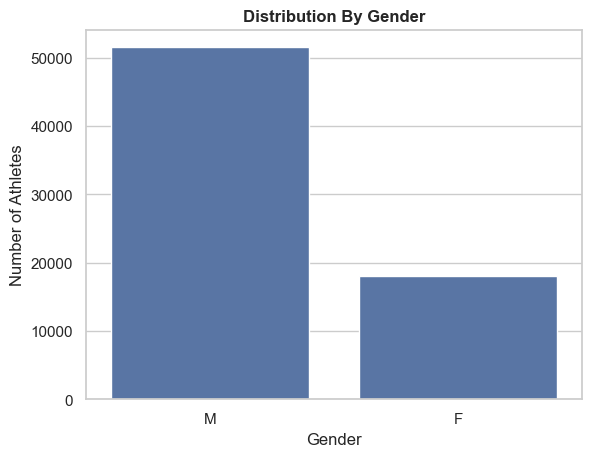

In [75]:
# Gender Representation in the Olympics
# Create count plot
sns.countplot(data=df, x='Sex')
plt.title('Distribution By Gender', fontsize=12, fontweight='bold')
plt.xlabel("Gender")
plt.ylabel("Number of Athletes")
plt.show()


Shows a significantly higher number of male athletes compared to female athletes, highlighting a historical gender imbalance in Olympic participation.

### Age Representation in the Olympics

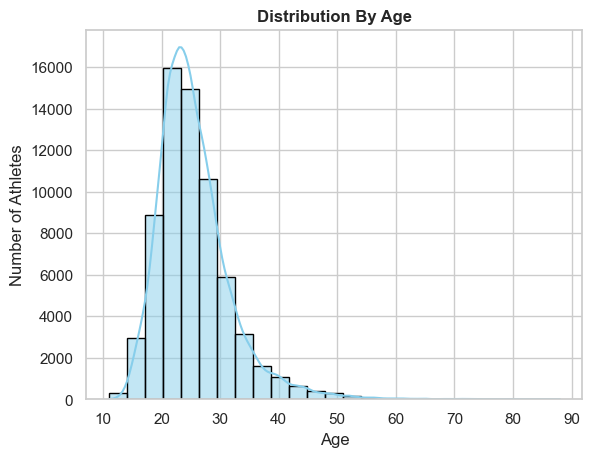

In [76]:
# Age Representation in the Olympics
# Create hist plot
sns.histplot(data=df, x='Age', bins=25, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution By Age', fontsize=12, fontweight='bold')
plt.xlabel("Age")
plt.ylabel("Number of Athletes")
plt.show()

Most athletes fall within the 20–30 age range, indicating that Olympic performance typically peaks in early adulthood. The distribution is right-skewed, with fewer athletes participating at older ages.

### Height Representation in the Olympics

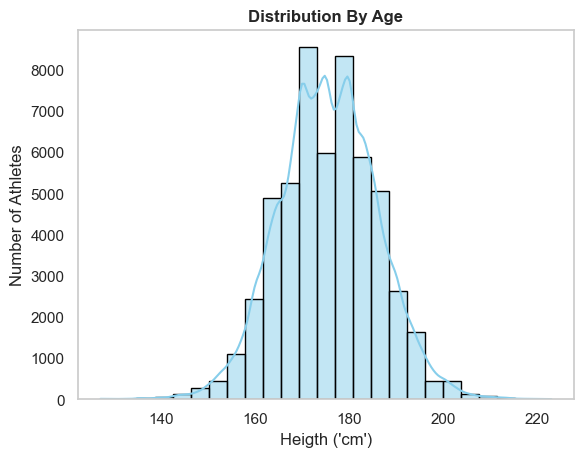

In [77]:
# Height Representation in the Olympics
# Create hist plot
sns.histplot(data=df, x='Height', bins=25, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution By Age', fontsize=12, fontweight='bold')
plt.xlabel("Heigth ('cm')")
plt.ylabel("Number of Athletes")
plt.grid()
plt.show()

Most athletes fall between 165–185 cm in height. Extremely short or tall athletes are much less common.

### Weight Representation in the Olympics

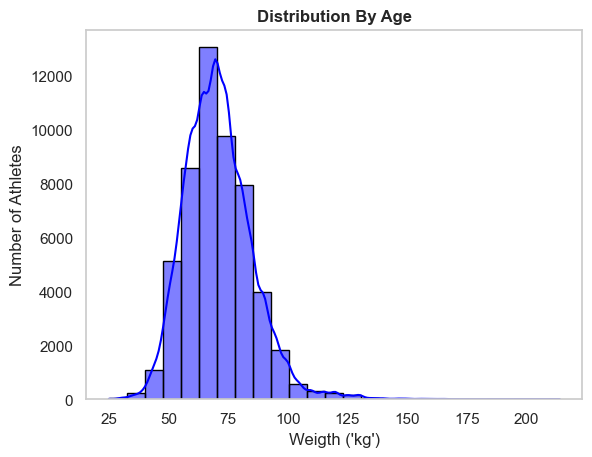

In [78]:
# Weight Representation in the Olympics
# Create hist plot
sns.histplot(data=df, x='Weight', bins=25, kde=True, color='blue', edgecolor='black')
plt.title('Distribution By Age', fontsize=12, fontweight='bold')
plt.xlabel("Weigth ('kg')")
plt.ylabel("Number of Athletes")
plt.grid()
plt.show()

Most athletes weigh between 60–80 kg, forming a right-skewed distribution. The peak around the mid-70 kg range reflects the typical build of Olympic competitors.

### Medal Distribution

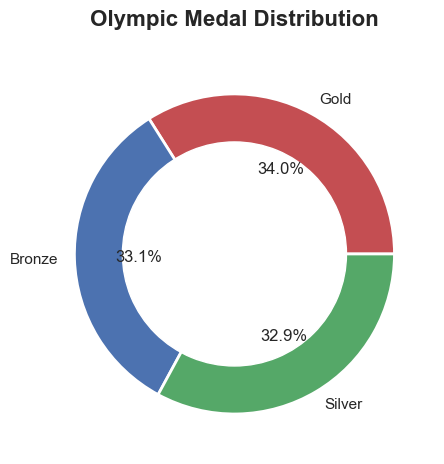

In [79]:
# Chart for Medal Distribution
medal_count = df['Medal'].value_counts()
color = ['r','b','g']

plt.pie(medal_count, labels=medal_count.index, colors=color, autopct='%1.1f%%',  wedgeprops={'edgecolor': 'white', 'linewidth': 2})
plt.pie([1], colors='w', radius=0.7) # Make a white circle at center to make it donat
plt.title("Olympic Medal Distribution", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


The distribution of Gold, Silver, and Bronze medals is nearly equal, showing a balanced spread of achievements among athletes.

### Medal Distribution over the year

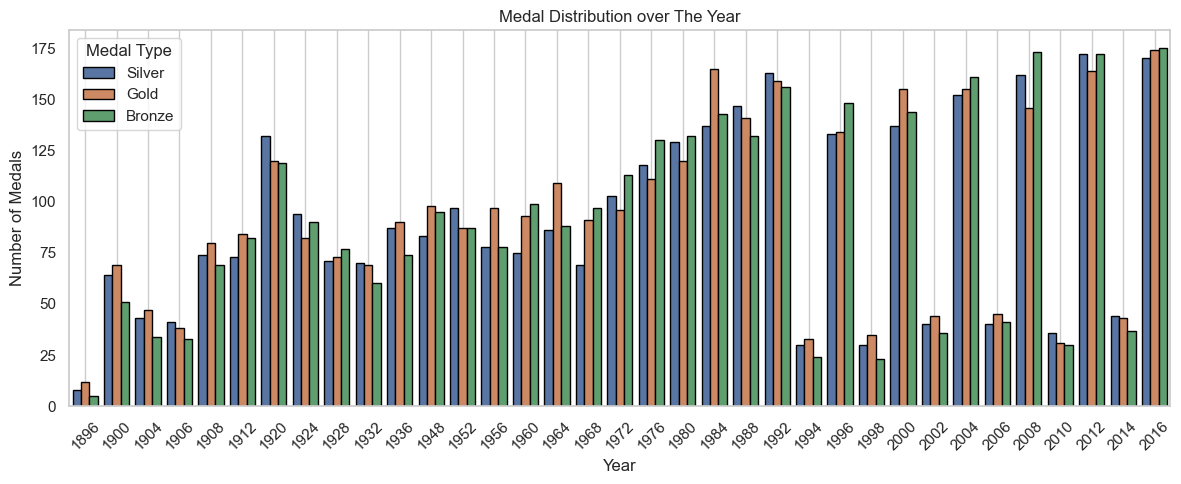

In [80]:
# Medal Distribution over the year
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Year', hue='Medal', edgecolor='black')
plt.title('Medal Distribution over The Year')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.legend(title="Medal Type", loc="upper left")
plt.grid()
plt.tight_layout()
plt.show()

### Average Age of Athletes Over the Years

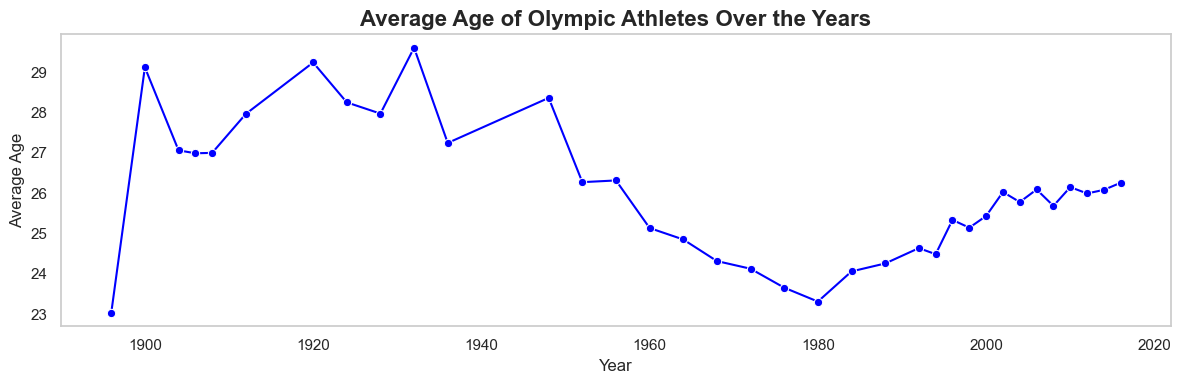

In [81]:
#Average Age of Athletes Over the Years

year_avg_age = df.groupby('Year')['Age'].mean()

plt.figure(figsize=(12, 4))
sns.lineplot(x=year_avg_age.index, y=year_avg_age.values, marker='o', color='blue')

plt.title("Average Age of Olympic Athletes Over the Years", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Age", fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

The average age of Olympic athletes peaked in the early 1900s, declined steadily through the mid-20th century, and has gradually risen again in recent decades. This reflects evolving training methods, sport specialization, and longer athletic careers.

### Median Height of Athletes by Sport

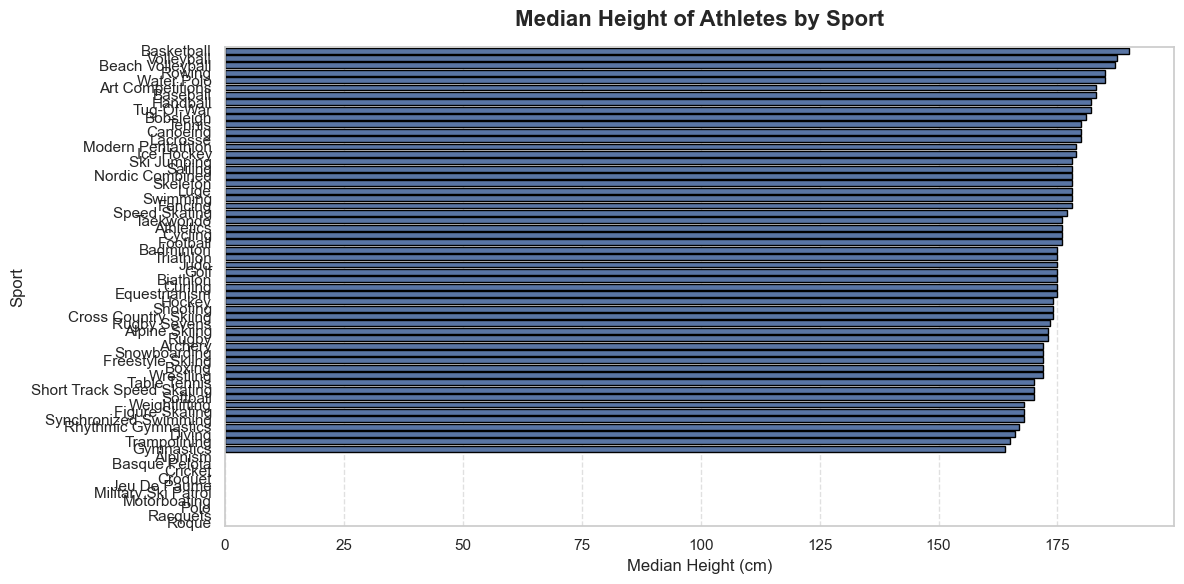

In [82]:
# Median Height of Athletes by Sport

sport_median_height = df.groupby("Sport")['Height'].median().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    y=sport_median_height.index,
    x=sport_median_height.values,
    edgecolor="black"
)

plt.title("Median Height of Athletes by Sport", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Median Height (cm)", fontsize=12)
plt.ylabel("Sport", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Sports like basketball and volleyball have the tallest athletes, while gymnastics and figure skating have the shortest, showing how physical demands of each sport shape athlete height profiles.

### Median Height of Athletes by Sport

In [83]:
# Median Height of Athletes by Sport

sport_median_height = df.groupby("Sport")['Height'].median()
max_height = sport_median_height.max()
tallest_sport = sport_median_height[sport_median_height == max_height]
print(f"Sport(s) with the tallest athletes: {tallest_sport}")

Sport(s) with the tallest athletes: Sport
Basketball    190.0
Name: Height, dtype: float64


### Sport with the Shortest Athletes (Median Height)

In [84]:
# Sport with the Shortest Athletes (Median Height)

sport_median_height = df.groupby("Sport")['Height'].median()
min_height = sport_median_height.min()
shortest_sport = sport_median_height[sport_median_height == min_height]
print(f"Sport with the shortest athletes: {shortest_sport}")

Sport with the shortest athletes: Sport
Gymnastics    164.0
Name: Height, dtype: float64


### Average Weight by Sport and Gender

In [85]:
# Average Weight by Sport and Gender
sport_gender_avg_weight = (
    df.groupby(['Sport', 'Sex'])['Weight']
    .mean()
    .sort_values(ascending=False)
)

print(sport_gender_avg_weight)

Sport                Sex
Tug-Of-War           M      93.090909
Basketball           M      91.173979
Rugby Sevens         M      90.555556
Bobsleigh            M      89.593561
Beach Volleyball     M      88.820513
                              ...    
Military Ski Patrol  M            NaN
Motorboating         M            NaN
Polo                 M            NaN
Racquets             M            NaN
Roque                M            NaN
Name: Weight, Length: 114, dtype: float64


### Athlete Participation by Country and Gender

<Figure size 1200x600 with 0 Axes>

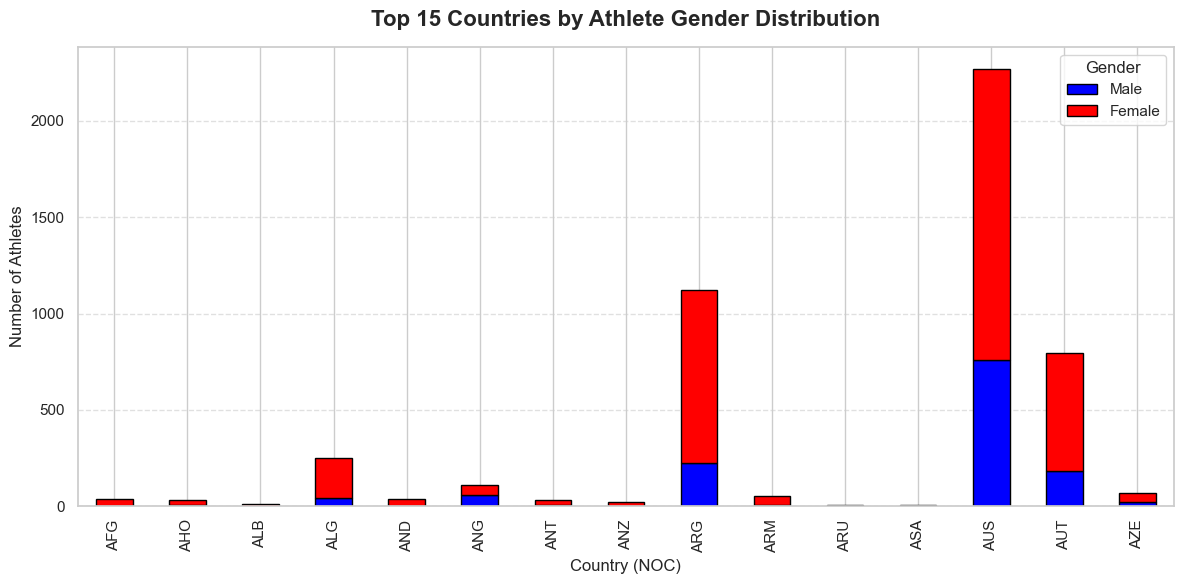

In [86]:
# Athlete Participation by Country and Gender

country_gender_count = df.groupby(['NOC', 'Sex'])['ID'].count().unstack().fillna(0)

plt.figure(figsize=(12, 6))
country_gender_count.head(15).plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=['blue', 'red'],
    edgecolor='black'
)

plt.title("Top 15 Countries by Athlete Gender Distribution", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Country (NOC)", fontsize=12)
plt.ylabel("Number of Athletes", fontsize=12)
plt.legend(title="Gender", labels=["Male", "Female"])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Australia and Argentina have the highest athlete counts among the listed countries, with females outnumbering males in most cases. Overall, female participation is strong across the top countries shown.

### Find the Country with the Maximum Number of Gold Medals

In [87]:
# Find the Country with the Maximum Number of Gold Medals

country_gold_medals = (
    df[df['Medal'] == "Gold"]
    .groupby("NOC")['Medal']
    .count()
)

max_gold_achieved_country = country_gold_medals.max()
top_country = country_gold_medals[country_gold_medals == max_gold_achieved_country]

print("Country with the Most Gold Medals:")
print(top_country)

Country with the Most Gold Medals:
NOC
USA    747
Name: Medal, dtype: int64


### Total Gold Medals by Country

C:\Users\sneha\AppData\Local\Temp\ipykernel_18428\2220095592.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


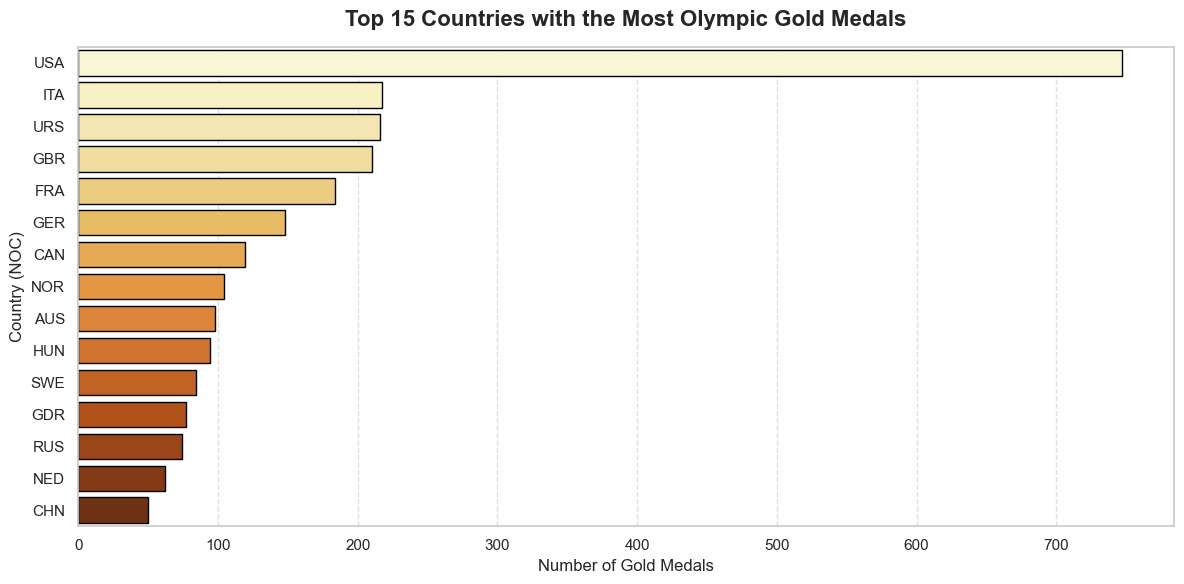

In [88]:
# Total Gold Medals by Country

country_gold_medals = (
    df[df['Medal'] == "Gold"]
    .groupby("NOC")['Medal']
    .count()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=country_gold_medals.head(15).values,
    y=country_gold_medals.head(15).index,
    palette="YlOrBr",  # Yellow–Orange–Brown gradient (looks golden!)
    edgecolor="black"
)

plt.title("Top 15 Countries with the Most Olympic Gold Medals", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Number of Gold Medals", fontsize=12)
plt.ylabel("Country (NOC)", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The USA overwhelmingly leads with the highest number of Olympic gold medals. Italy, the USSR, and Great Britain follow at a distance, showing a strong but notably lower historical performance.

### Number of Unique Events per Sport

C:\Users\sneha\AppData\Local\Temp\ipykernel_18428\3097049812.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


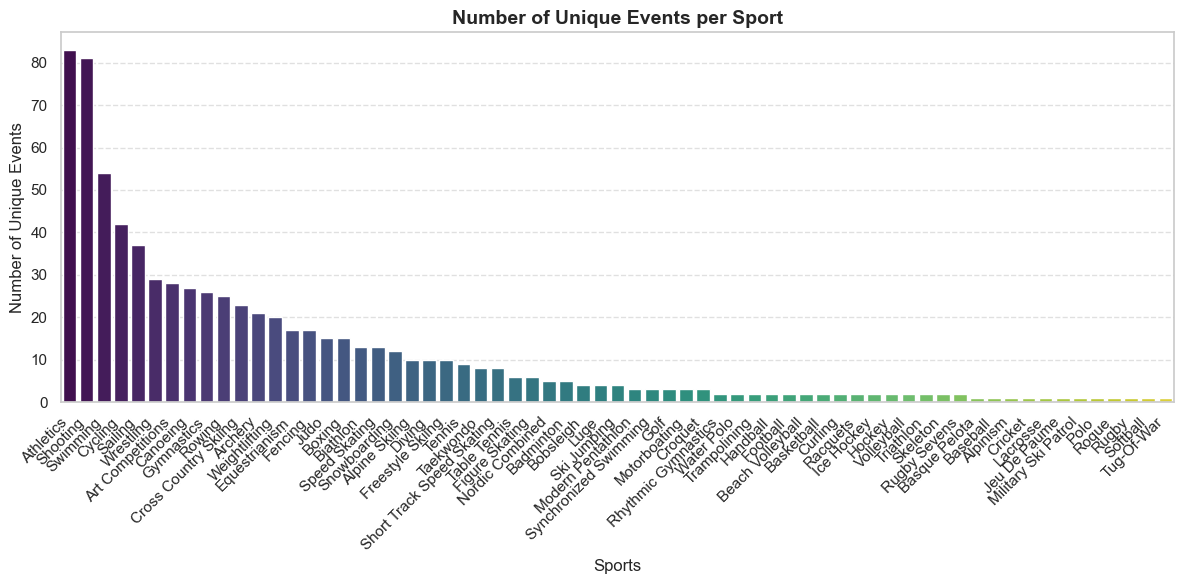

In [89]:
# Number of Unique Events per Sport

# Count unique events for each sport
sport_event_count = df.groupby("Sport")['Event'].nunique().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(
    x=sport_event_count.index,
    y=sport_event_count.values,
    palette="viridis"
)

plt.title("Number of Unique Events per Sport", fontsize=14, fontweight='bold')
plt.xlabel("Sports", fontsize=12)
plt.ylabel("Number of Unique Events", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Athletics and Swimming have the highest number of unique events, reflecting their wide range of competitive categories. 

### Number of Participants Over the Years

C:\Users\sneha\AppData\Local\Temp\ipykernel_18428\195276612.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


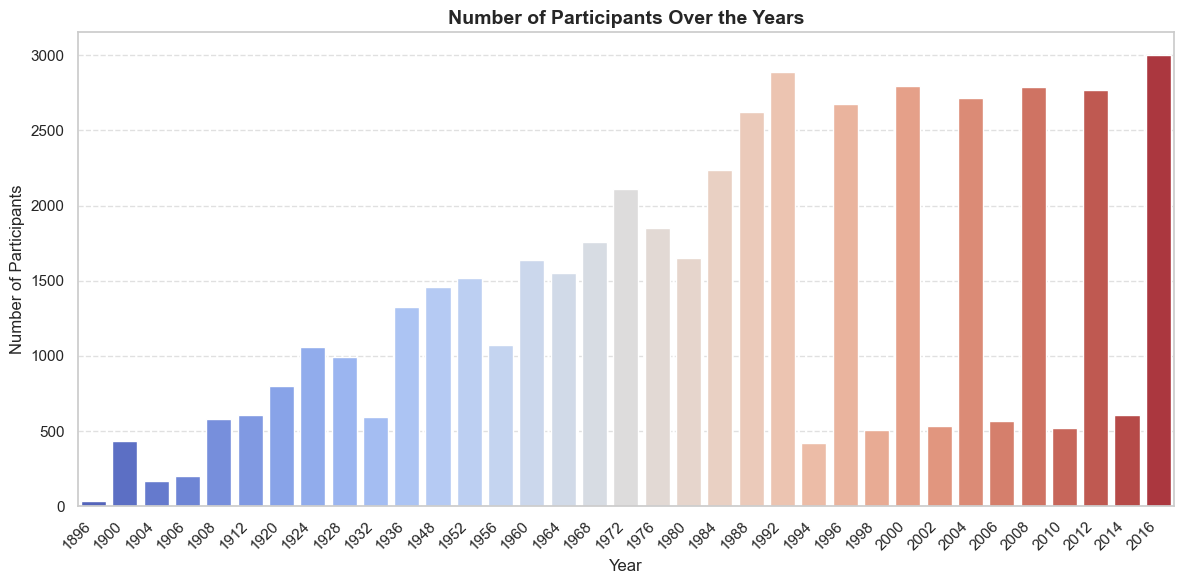

In [90]:
# Number of Participants Over the Years

# Count unique participants per year
year_participant_count = df.groupby('Year')['ID'].nunique()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=year_participant_count.index,
    y=year_participant_count.values,
    palette="coolwarm"
)

plt.title("Number of Participants Over the Years", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Participants", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The number of Olympic participants has increased dramatically over time, especially from the mid-20th century onward, reflecting the growing global reach and inclusivity of the Games. Recent years show consistently high participation levels

### Top Countries by Average Age of Participants

C:\Users\sneha\AppData\Local\Temp\ipykernel_18428\3138404894.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


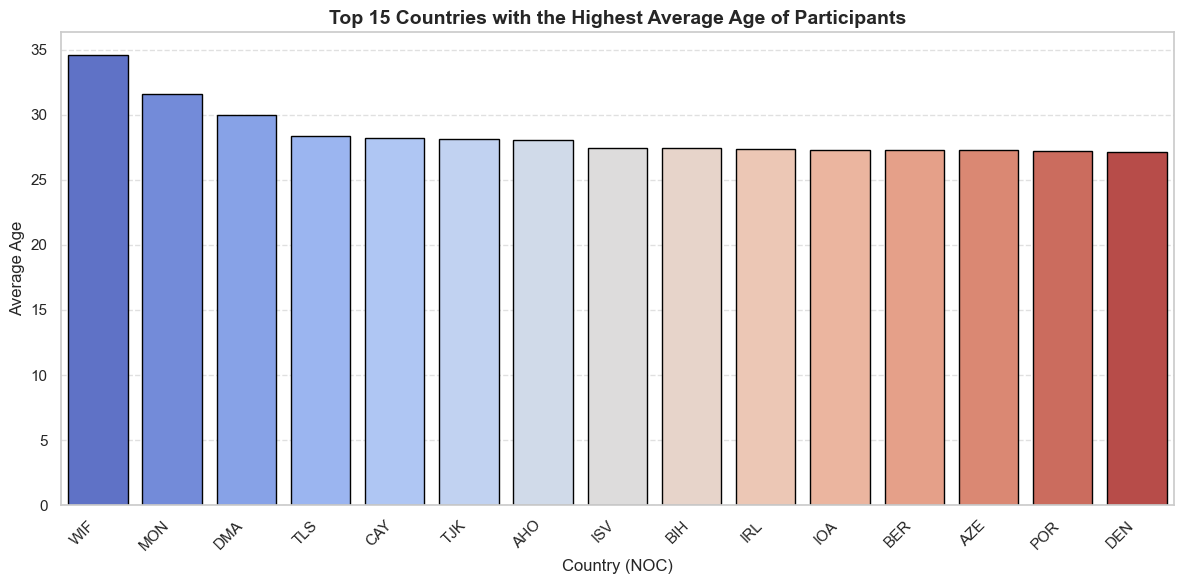

In [91]:
# Top Countries by Average Age of Participants

country_avg_age = df.groupby("NOC")['Age'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=country_avg_age.head(15).index,
    y=country_avg_age.head(15).values,
    palette="coolwarm",
    edgecolor="black"
)

plt.title("Top 15 Countries with the Highest Average Age of Participants", fontsize=14, fontweight='bold')
plt.xlabel("Country (NOC)", fontsize=12)
plt.ylabel("Average Age", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Smaller nations like the WIF, MON, and DMA have the highest average athlete ages, suggesting older participant groups or limited youth representation. Most top countries have average ages clustered around 27–28 years.

### Age Distribution by Olympic Season

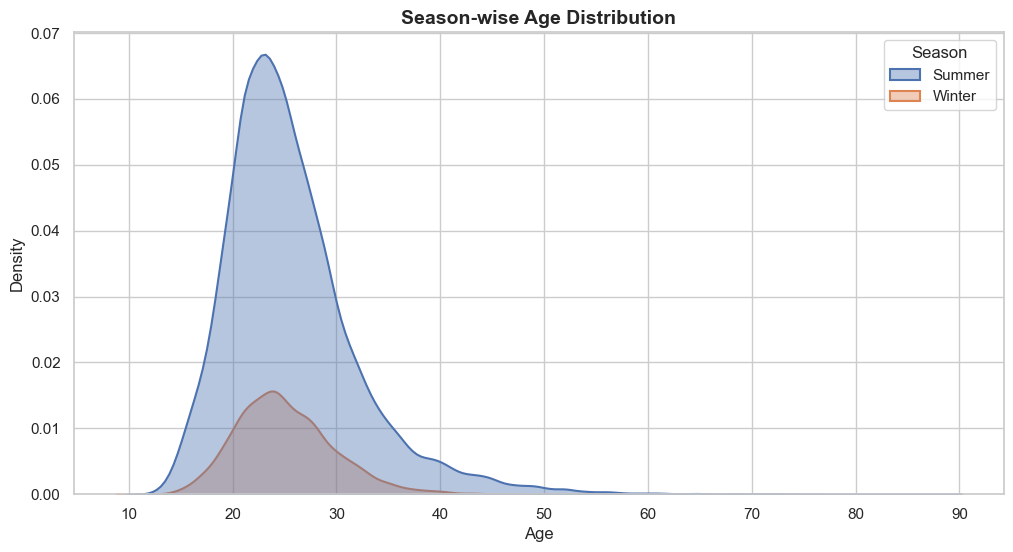

In [92]:
# Age Distribution by Olympic Season

# Set theme
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

# KDE Plot
sns.kdeplot(
    data=df, 
    x="Age", 
    hue="Season", 
    fill=True,
    linewidth=1.5,
    alpha=0.4
)

plt.title("Season-wise Age Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

Summer athletes tend to be younger, with a strong peak in the early 20s, while Winter athletes show a slightly higher age distribution. This reflects differences in physical demands and skill development across the two seasons.

### Height Distribution by Medal Type

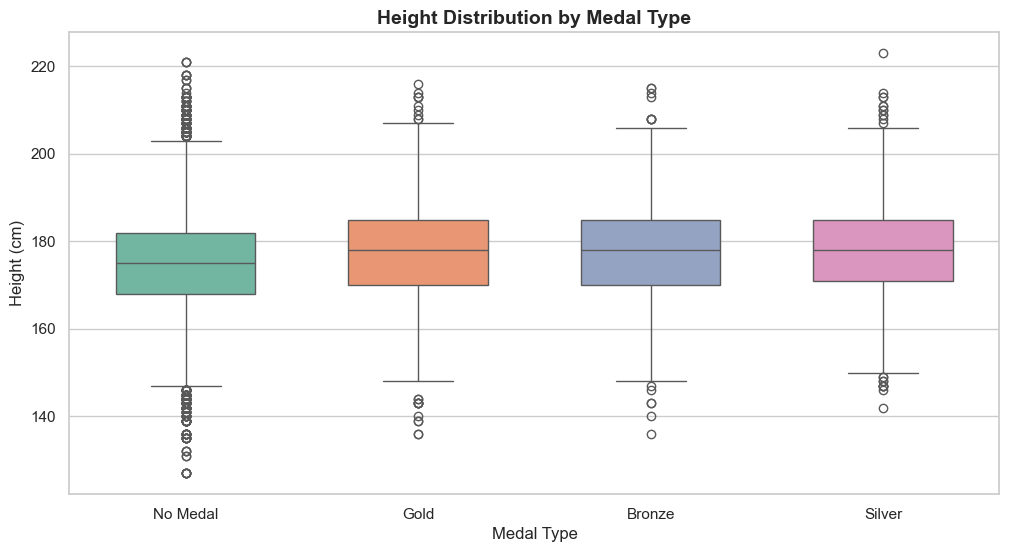

In [93]:
#Height Distribution by Medal Type

# Create a column for Medal Type (Replace NaN with 'No Medal')
df['Medal_Type'] = df['Medal'].fillna('No Medal')

sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

sns.boxplot(
    data=df,
    x="Medal_Type",
    y="Height",
    width=0.6,
    hue="Medal_Type",
    palette="Set2",
    legend=False
)

plt.title("Height Distribution by Medal Type", fontsize=14, fontweight='bold')
plt.xlabel("Medal Type")
plt.ylabel("Height (cm)")
plt.show()

Medal-winning athletes especially Gold and Silver tend to have slightly taller median heights than non-medal athletes, suggesting height may offer an advantage in many Olympic sports.

### Tallest Athlete in the Olympics

In [94]:
# Tallest Athlete in the Olympics

tallest_athlete = df[df['Height'] == df['Height'].max()]
print("Tallest Athlete:")
print(tallest_athlete[['ID', 'Name', 'Height', 'Sport']])


Tallest Athlete:
          ID                  Name  Height       Sport
32376  16639  Tommy Loren Burleson   223.0  Basketball


### Heaviest Athlete in the Olympics

In [95]:
# Heaviest Athlete in the Olympics

heaviest_athlete = df[df['Weight'] == df['Weight'].max()]
print("Heaviest Athlete:")
print(heaviest_athlete[['ID', 'Name', 'Weight', 'Sport']])


Heaviest Athlete:
          ID               Name  Weight Sport
23155  12177  Ricardo Blas, Jr.   214.0  Judo
23156  12177  Ricardo Blas, Jr.   214.0  Judo


### Athlete Height vs Weight by Medal Status

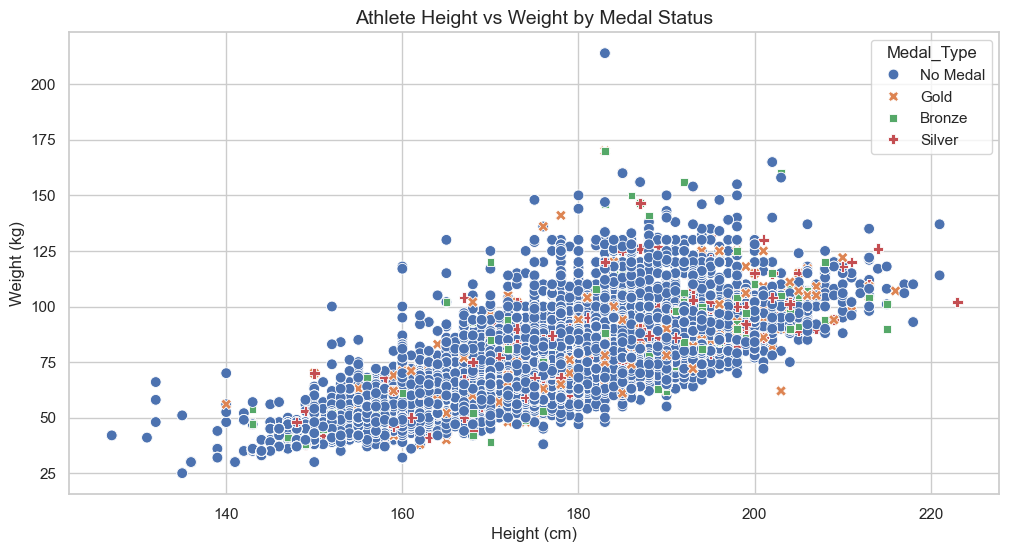

In [96]:
# Athlete Height vs Weight by Medal Status

df['Medal_Type'] = df['Medal'].fillna('No Medal')

sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

sns.scatterplot(
    data=df,
    x="Height",
    y="Weight",
    hue="Medal_Type",
    style="Medal_Type",   
    s=60,                 
)

plt.title("Athlete Height vs Weight by Medal Status", fontsize=14)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()

Clear positive correlation between height and weight across all athletes, and medal winners tend to cluster within a similar optimal height–weight range.